<a href="https://colab.research.google.com/github/N-droid23/Financial-fraud-detection/blob/main/FinalProject_AAI595.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Transaction Data
transaction_records = pd.read_csv('/content/drive/MyDrive/transaction_records.csv')
transaction_metadata = pd.read_csv('/content/drive/MyDrive/transaction_metadata.csv')

print("Transaction Records:")
print(transaction_records.head())

Transaction Records:
   TransactionID     Amount  CustomerID
0              1  55.530334        1952
1              2  12.881180        1027
2              3  50.176322        1955
3              4  41.634001        1796
4              5  78.122853        1946


In [ ]:
# Customer Profiles
customer_data = pd.read_csv('/content/drive/MyDrive/customer_data.csv')
account_activity = pd.read_csv('/content/drive/MyDrive/account_activity.csv')

print("\nCustomer Data:")
print(customer_data.head())


Customer Data:
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005


In [ ]:
# Fraudulent Patterns
fraud_indicators = pd.read_csv('/content/drive/MyDrive/fraud_indicators.csv')
suspicious_activity = pd.read_csv('/content/drive/MyDrive/suspicious_activity.csv')

print("\nFraud Indicators:")
print(fraud_indicators.head())


Fraud Indicators:
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0


In [ ]:
# Transaction Amounts
amount_data = pd.read_csv('/content/drive/MyDrive/amount_data.csv')
anomaly_scores = pd.read_csv('/content/drive/MyDrive/anomaly_scores.csv')

print("\nTransaction Amounts:")
print(amount_data.head())


Transaction Amounts:
   TransactionID  TransactionAmount
0              1          79.413607
1              2          12.053087
2              3          33.310357
3              4          46.121117
4              5          54.051618


In [ ]:
# Merchant Information
merchant_data = pd.read_csv('/content/drive/MyDrive/merchant_data.csv')
transaction_category_labels = pd.read_csv('/content/drive/MyDrive/transaction_category_labels.csv')

print("\nMerchant Data:")
print(merchant_data.head())


Merchant Data:
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location 2001
1        2002  Merchant 2002  Location 2002
2        2003  Merchant 2003  Location 2003
3        2004  Merchant 2004  Location 2004
4        2005  Merchant 2005  Location 2005


In [ ]:
# Step 1: Merging relevant datasets
df_merged = transaction_records.merge(transaction_metadata, on='TransactionID', how='left')
df_merged = df_merged.merge(amount_data, on='TransactionID', how='left')

df_merged = df_merged.merge(customer_data[['CustomerID', 'Age', 'Address']], on='CustomerID', how='left')
df_merged = df_merged.merge(fraud_indicators, on='TransactionID', how='left')
df_merged = df_merged.merge(suspicious_activity, on='CustomerID', how='left')
df_merged = df_merged.merge(account_activity, on='CustomerID', how='left')
df_merged = df_merged.merge(transaction_category_labels, on='TransactionID', how='left')
df_merged = df_merged.merge(anomaly_scores, on='TransactionID', how='left')

In [ ]:
print(df_merged.isnull().sum())

TransactionID        0
Amount               0
CustomerID           0
Timestamp            0
MerchantID           0
TransactionAmount    0
Age                  0
Address              0
FraudIndicator       0
SuspiciousFlag       0
AccountBalance       0
LastLogin            0
Category             0
AnomalyScore         0
dtype: int64


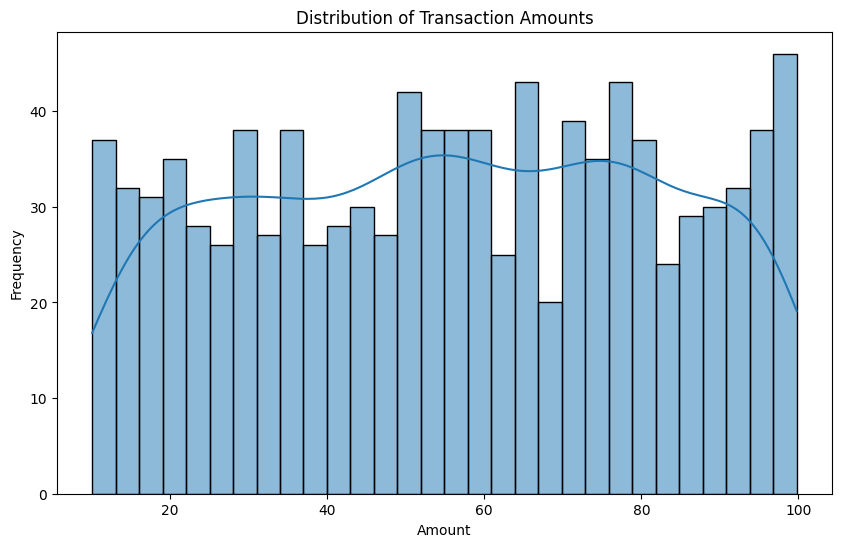

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['TransactionAmount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Summary of the statistics before preprocessing
print("\nSummary statistics before preprocessing:")
print(df_merged.describe(include='all'))


Summary statistics before preprocessing:
        TransactionID       Amount   CustomerID            Timestamp  \
count     1000.000000  1000.000000  1000.000000                 1000   
unique            NaN          NaN          NaN                 1000   
top               NaN          NaN          NaN  2022-01-01 00:00:00   
freq              NaN          NaN          NaN                    1   
mean       500.500000    55.394871  1496.626000                  NaN   
std        288.819436    25.070809   289.229047                  NaN   
min          1.000000    10.006933  1001.000000                  NaN   
25%        250.750000    34.502315  1239.000000                  NaN   
50%        500.500000    57.844325  1501.000000                  NaN   
75%        750.250000    75.858576  1739.250000                  NaN   
max       1000.000000    99.887410  2000.000000                  NaN   

         MerchantID  TransactionAmount          Age       Address  \
count   1000.000000     

In [ ]:
# For numerical columns (mean imputation)
for col in df_merged.select_dtypes(include=['float64', 'int64']).columns:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mean())

# For categorical columns (mode imputation)
for col in df_merged.select_dtypes(include=['object']).columns:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

In [ ]:
# Choosing the attributes we want in our project
selected_columns = ['TransactionID', 'TransactionAmount', 'MerchantID', 'FraudIndicator','CustomerID','SuspiciousFlag']
df_selected = df_merged[selected_columns]

print("\nData after selecting specific attributes:")
print(df_selected.head())


Data after selecting specific attributes:
   TransactionID  TransactionAmount  MerchantID  FraudIndicator  CustomerID  \
0              1          79.413607        2701               0        1952   
1              2          12.053087        2070               0        1027   
2              3          33.310357        2238               0        1955   
3              4          46.121117        2879               0        1796   
4              5          54.051618        2966               0        1946   

   SuspiciousFlag  
0               0  
1               0  
2               0  
3               0  
4               0  


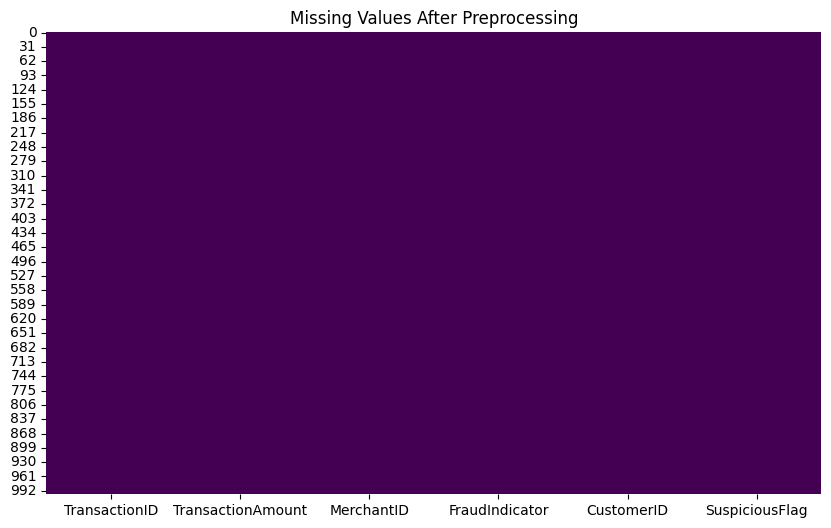

In [ ]:
# Visualize missing data after preprocessing
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Preprocessing")
plt.show()


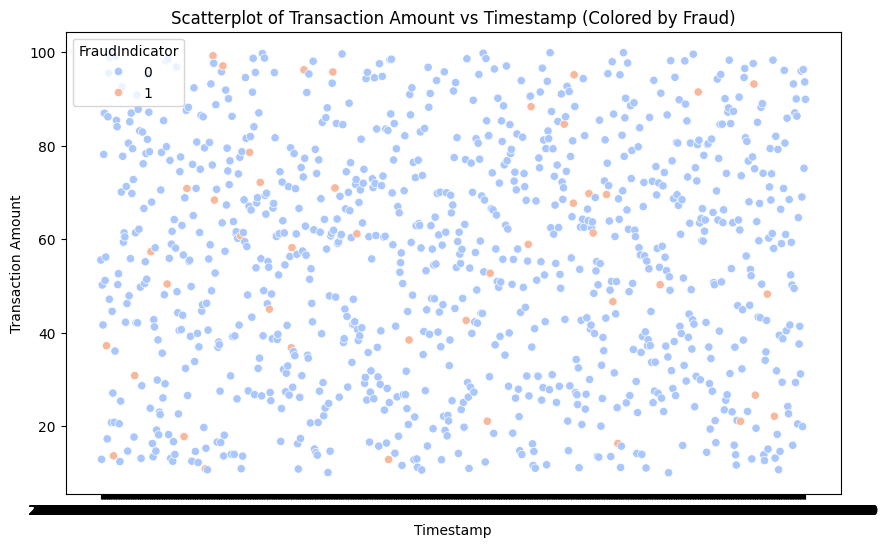

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Amount', hue='FraudIndicator', data=df_merged, palette='coolwarm')

# Add labels and title
plt.title('Scatterplot of Transaction Amount vs Timestamp (Colored by Fraud)')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')

# Show plot
plt.show()

<Figure size 1000x600 with 0 Axes>

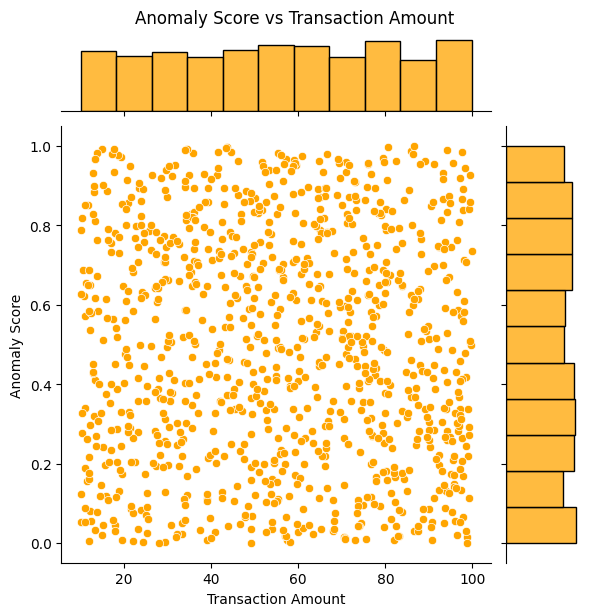

In [ ]:
df_anomaly = pd.merge(anomaly_scores, amount_data, on='TransactionID')

# Joint plot of Anomaly Score vs Transaction Amount
plt.figure(figsize=(10, 6))
sns.jointplot(x='TransactionAmount', y='AnomalyScore', data=df_anomaly, kind='scatter', color='orange')

# Adding labels and title
plt.suptitle('Anomaly Score vs Transaction Amount', y=1.02)
plt.xlabel('Transaction Amount')
plt.ylabel('Anomaly Score')

plt.show()

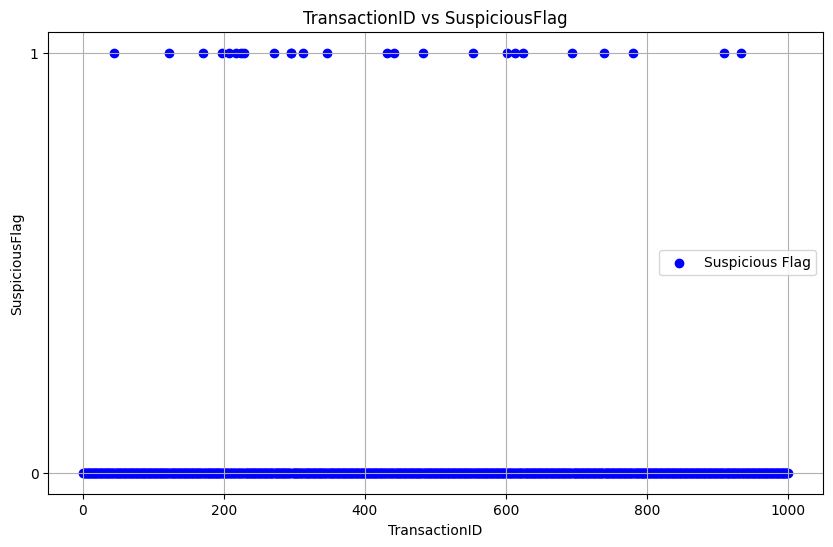

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['TransactionID'], df_merged['SuspiciousFlag'], c='blue', label='Suspicious Flag')
plt.title('TransactionID vs SuspiciousFlag')
plt.xlabel('TransactionID')
plt.ylabel('SuspiciousFlag')
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.show()


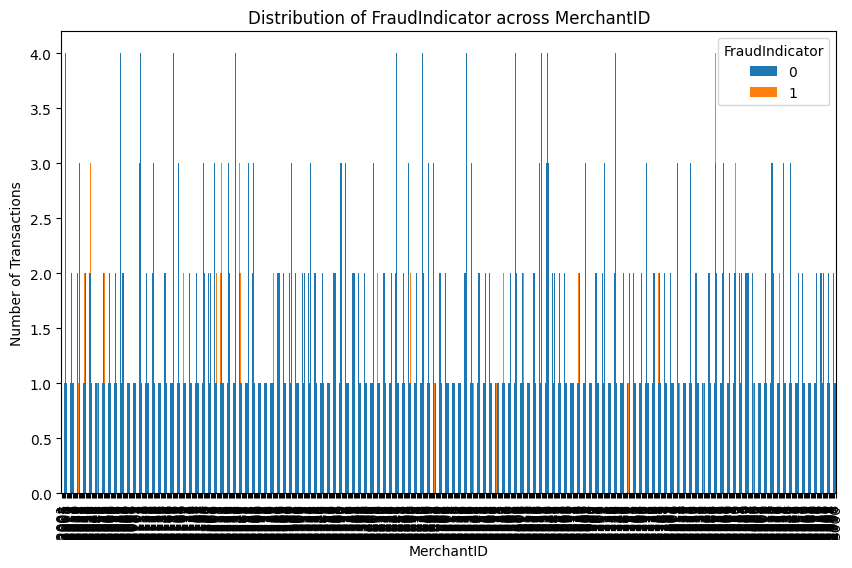

In [ ]:
grouped = df_merged.groupby(['MerchantID', 'FraudIndicator']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of FraudIndicator across MerchantID')
plt.xlabel('MerchantID')
plt.ylabel('Number of Transactions')
plt.legend(title='FraudIndicator')
plt.show()

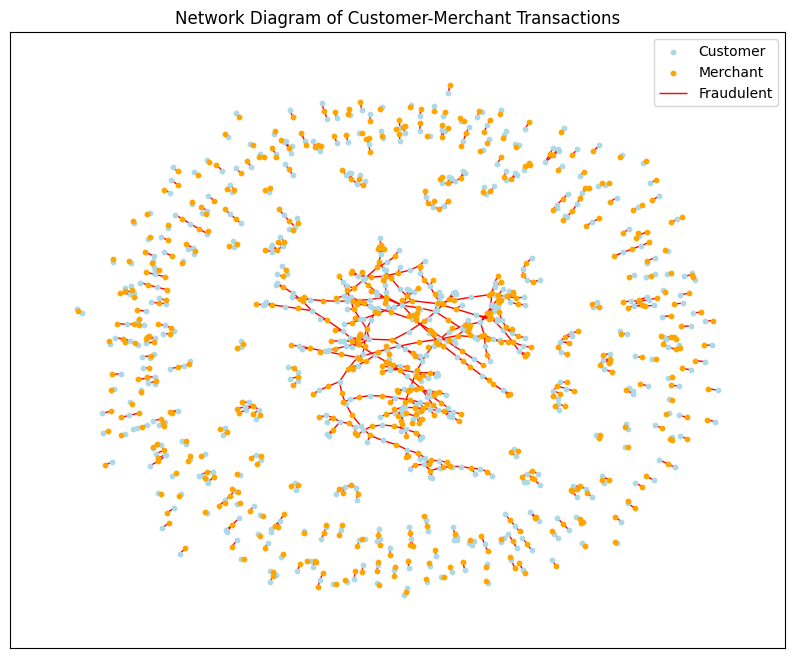

In [ ]:
import networkx as nx
# Create a graph
G = nx.Graph()

# Filter for fraudulent transactions
#fraudulent_df = df_merged[df_merged['FraudIndicator'] == 1]


# Add nodes and edges
for _, row in df_merged.iterrows():
    G.add_node(row['CustomerID'], type='customer')
    G.add_node(row['MerchantID'], type='merchant')
    G.add_edge(row['CustomerID'], row['MerchantID'], fraud=row['FraudIndicator'])

# Improved layout
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 8))

# Draw nodes with sizes based on their degree (number of connections)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n, attr in G.nodes(data=True) if attr['type'] == 'customer'],
                       node_color='lightblue', node_size=10, label='Customer')

nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n, attr in G.nodes(data=True) if attr['type'] == 'merchant'],
                       node_color='orange', node_size=10, label='Merchant')

# Draw edges with color based on fraud status
nx.draw_networkx_edges(G, pos,
                       edgelist=[(u, v) for u, v in G.edges],
                       edge_color='red', label='Fraudulent')

# Draw labels with better spacing
#nx.draw_networkx_labels(G, pos)

plt.title('Network Diagram of Customer-Merchant Transactions')
plt.legend(scatterpoints=1)
plt.show()

# Model training

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = df_merged  # for clarity, assigning to df

# Feature Engineering
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['LastLogin'] = pd.to_datetime(df['LastLogin'])

# Temporal and ratio features
df['TransactionHour'] = df['Timestamp'].dt.hour
df['TransactionAmountRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1)  # Avoid division by zero
df['TimeSinceLastLogin'] = (df['Timestamp'] - df['LastLogin']).dt.total_seconds() / 3600  # in hours

# Spending behavior features
df['AboveAverageSpending'] = df.groupby('CustomerID')['TransactionAmount'].transform(lambda x: x > (x.mean() * 1.5)).astype(int)

# Flagging suspicious categories
suspicious_categories = ['electronics', 'luxury', 'gambling']
df['SuspiciousCategory'] = df['Category'].apply(lambda x: 1 if x.lower() in suspicious_categories else 0)



In [ ]:
# Select features and target variable
features = ['TransactionHour', 'TransactionAmountRatio', 'AboveAverageSpending', 'SuspiciousCategory', 'TimeSinceLastLogin']
X = df[features]
y = df['FraudIndicator']

In [ ]:
# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
# Initialize results dictionary to store evaluation metrics
results = {}


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
results['Logistic Regression'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_log_reg),
    "Classification Report": classification_report(y_test, y_pred_log_reg, output_dict=True)
}

In [ ]:
# Decision Tree
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
results['Decision Tree'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_tree),
    "Classification Report": classification_report(y_test, y_pred_tree, output_dict=True)
}


In [ ]:
# Random Forest
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf, output_dict=True)
}

In [ ]:
# Gradient Boosting (without class balancing as it doesn’t support class_weight directly)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
results['Gradient Boosting'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_gb),
    "Classification Report": classification_report(y_test, y_pred_gb, output_dict=True)
}

In [ ]:
# Support Vector Machine (SVM) with class weighting
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm),
    "Classification Report": classification_report(y_test, y_pred_svm, output_dict=True)
}

In [ ]:
# Ensemble Model using Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('decision_tree', tree),
        ('random_forest', rf),
        ('gradient_boost', gb)
    ],
    voting='hard'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
results['Ensemble Model'] = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_ensemble),
    "Classification Report": classification_report(y_test, y_pred_ensemble, output_dict=True)
}

In [ ]:
# Displaying summary of model results
for model_name, metrics in results.items():
    print(f"\n{model_name} - Confusion Matrix:\n", metrics["Confusion Matrix"])
    print(f"{model_name} - Classification Report:\n", metrics["Classification Report"])



Logistic Regression - Confusion Matrix:
 [[161 125]
 [102 185]]
Logistic Regression - Classification Report:
 {'0': {'precision': 0.6121673003802282, 'recall': 0.5629370629370629, 'f1-score': 0.5865209471766849, 'support': 286.0}, '1': {'precision': 0.5967741935483871, 'recall': 0.6445993031358885, 'f1-score': 0.6197654941373534, 'support': 287.0}, 'accuracy': 0.6038394415357766, 'macro avg': {'precision': 0.6044707469643076, 'recall': 0.6037681830364757, 'f1-score': 0.6031432206570191, 'support': 573.0}, 'weighted avg': {'precision': 0.6044573149339133, 'recall': 0.6038394415357766, 'f1-score': 0.6031722298603007, 'support': 573.0}}

Decision Tree - Confusion Matrix:
 [[218  68]
 [ 58 229]]
Decision Tree - Classification Report:
 {'0': {'precision': 0.7898550724637681, 'recall': 0.7622377622377622, 'f1-score': 0.7758007117437722, 'support': 286.0}, '1': {'precision': 0.7710437710437711, 'recall': 0.7979094076655052, 'f1-score': 0.7842465753424658, 'support': 287.0}, 'accuracy': 0.780

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Set up parameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'class_weight': ['balanced']
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'class_weight': ['balanced']
    }
}

# Initialize models to tune
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Results dictionary to store best models and their parameters
best_models = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='f1', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score for {model_name}: {grid_search.best_score_}\n")

# Evaluate each tuned model on the test set
for model_name, model in best_models.items():
    print(f"Evaluating {model_name} on test data...")
    y_pred = model.predict(X_test)

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n{model_name} Confusion Matrix:\n", conf_matrix)
    print(f"{model_name} Classification Report:\n", class_report)


Performing Grid Search for Random Forest...
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 100}
Best F1 score for Random Forest: 0.80942458152965

Performing Grid Search for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best F1 score for Gradient Boosting: 0.8059014519897966

Performing Grid Search for SVM...
Best parameters for SVM: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
Best F1 score for SVM: 0.6884864187480013

Performing Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 score for Logistic Regression: 0.5886101725256774

Evaluating Random Forest on test data...

Random Forest Confusion Matrix:
 [[234  52]
 [ 44 243]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.

ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# --------------- ANN Model ---------------
print("Training ANN model...")

# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
history_ann = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_loss, ann_accuracy, ann_precision, ann_recall = ann_model.evaluate(X_test, y_test)
print(f"ANN - Loss: {ann_loss}, Accuracy: {ann_accuracy}, Precision: {ann_precision}, Recall: {ann_recall}")

Training ANN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - Precision: 0.5140 - Recall: 0.5078 - accuracy: 0.5075 - loss: 35.7237 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4991 - val_loss: 15.7044
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.4806 - Recall: 0.4942 - accuracy: 0.4969 - loss: 13.7030 - val_Precision: 0.5062 - val_Recall: 1.0000 - val_accuracy: 0.5113 - val_loss: 24.2917
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.5013 - Recall: 0.6188 - accuracy: 0.4917 - loss: 17.6234 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4991 - val_loss: 1.0141
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.4890 - Recall: 0.4728 - accuracy: 0.4935 - loss: 10.9474 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4991 - val_loss: 10.0054
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.4715 - Recall: 0.4529 - accuracy: 0.5129 - loss: 7.9490 - val_Precision

In [ ]:
# --------------- LSTM Model ---------------
print("Training LSTM model...")

# Reshape X for LSTM (3D shape required: samples, timesteps, features)
X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])  # (samples, timesteps, features)
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

lstm_model = Sequential([
    LSTM(128, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
lstm_loss, lstm_accuracy, lstm_precision, lstm_recall = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}, Precision: {lstm_precision}, Recall: {lstm_recall}")

Training LSTM model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - Precision: 0.4757 - Recall: 0.4933 - accuracy: 0.4825 - loss: 0.6934 - val_Precision: 0.5062 - val_Recall: 1.0000 - val_accuracy: 0.5113 - val_loss: 0.6922
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - Precision: 0.5149 - Recall: 0.8948 - accuracy: 0.5262 - loss: 0.6920 - val_Precision: 0.5089 - val_Recall: 1.0000 - val_accuracy: 0.5166 - val_loss: 0.6896
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.4514 - Recall: 0.2895 - accuracy: 0.4826 - loss: 0.6894 - val_Precision: 0.5428 - val_Recall: 0.9721 - val_accuracy: 0.5759 - val_loss: 0.6864
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.5023 - Recall: 0.7903 - accuracy: 0.4865 - loss: 0.6875 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4991 - val_loss: 0.6859
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.5203 - Recall: 0.5173 - accuracy: 0.5141 - loss: 0.6859 - val_Precision: 0.0000e+00 - val_R

Performance Visualization

You can visualize the training loss and accuracy for ANN and LSTM using the training history.

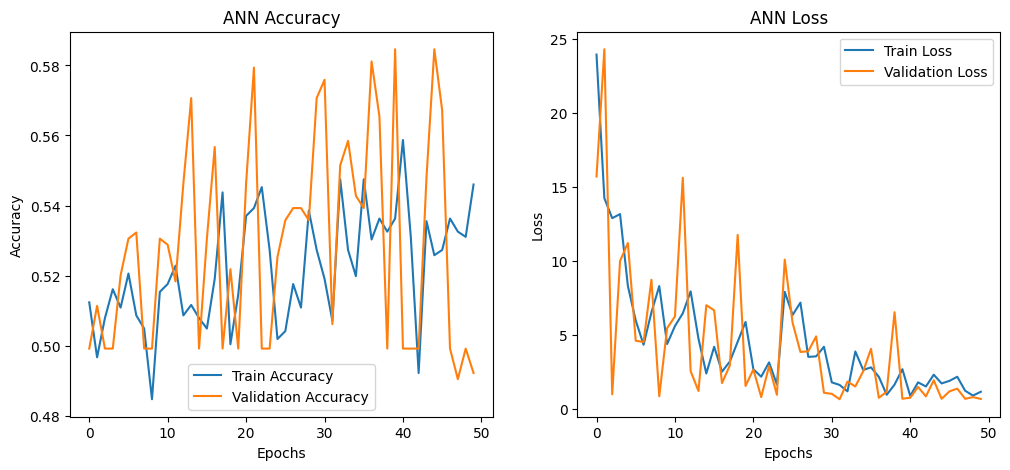

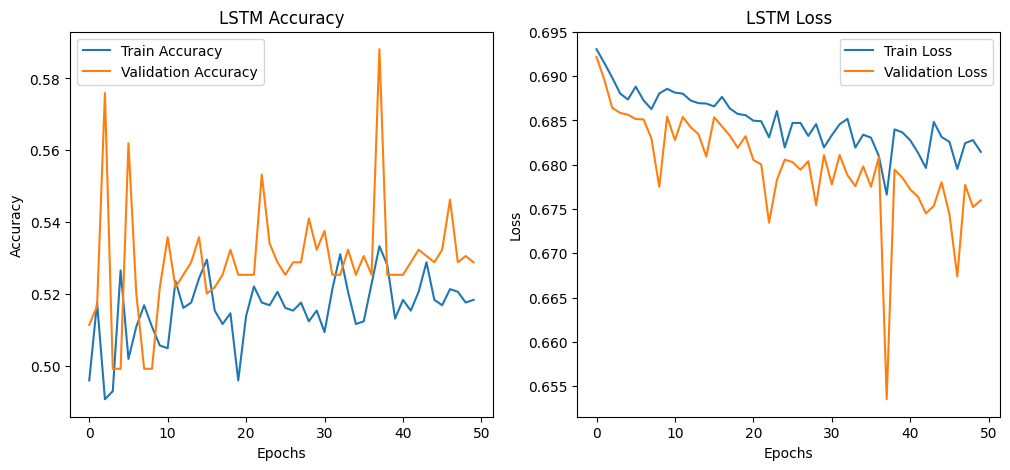

In [ ]:
import matplotlib.pyplot as plt

# Plot ANN model performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot LSTM model performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Hyperparameter Tuning (Keras Tuner)

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

def build_lstm_model(hp):
    model = Sequential([
        LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),
             activation='tanh',
             input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner_dir',
    project_name='lstm_tuning'
)

tuner.search(X_train_reshaped, y_train, epochs=10, validation_split=0.2)


Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.5522388219833374

Best val_accuracy So Far: 0.5970149437586466
Total elapsed time: 00h 02m 09s


Model Comparison (LSTM, Random Forest, XGBoost)

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasClassifier

# LSTM Model definition
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshaping the data for LSTM input
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Classifier
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train and evaluate models
models = [lstm_model, rf_model, xgb_model]
model_names = ["LSTM", "Random Forest", "XGBoost"]
results = {}

for name, model in zip(model_names, models):
    print(f"Training {name} model...")
    if name == "LSTM":
        model.fit(X_train_lstm, y_train)  # Train LSTM model
        y_pred = model.predict(X_test_lstm)  # Make predictions
    else:
        model.fit(X_train, y_train)  # Train Random Forest or XGBoost
        y_pred = model.predict(X_test)  # Make predictions

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    results[name] = {'accuracy': accuracy, 'confusion_matrix': cm}

    # Print out the results
    print(f"{name} Model Accuracy: {accuracy:.4f}")
    print(f"{name} Model Confusion Matrix:\n{cm}\n")

# Compare all model results
print("\n--- Model Comparison ---")
for name, result in results.items():
    print(f"\n{name} Model Accuracy: {result['accuracy']:.4f}")
    print(f"{name} Model Confusion Matrix:\n{result['confusion_matrix']}")


Training LSTM model...


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Accuracy: 0.5724
LSTM Model Confusion Matrix:
[[ 44 242]
 [  3 284]]

Training Random Forest model...
Random Forest Model Accuracy: 0.8412
Random Forest Model Confusion Matrix:
[[236  50]
 [ 41 246]]

Training XGBoost model...
XGBoost Model Accuracy: 0.7941
XGBoost Model Confusion Matrix:
[[225  61]
 [ 57 230]]


--- Model Comparison ---

LSTM Model Accuracy: 0.5724
LSTM Model Confusion Matrix:
[[ 44 242]
 [  3 284]]

Random Forest Model Accuracy: 0.8412
Random Forest Model Confusion Matrix:
[[236  50]
 [ 41 246]]

XGBoost Model Accuracy: 0.7941
XGBoost Model Confusion Matrix:
[[225  61]
 [ 57 230]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

print(f"Random Forest - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Random Forest - Accuracy: 0.8411867364746946, Precision: 0.831081081081081, Recall: 0.8571428571428571, F1 Score: 0.8439108061749572


Model Explainability (SHAP and LIME)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d32c8c15832b72c8f3494164d1deaa8c80d0ca1eb8e547f3afeba20121190638
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


 99%|===================| 1130/1146 [00:23<00:00]       

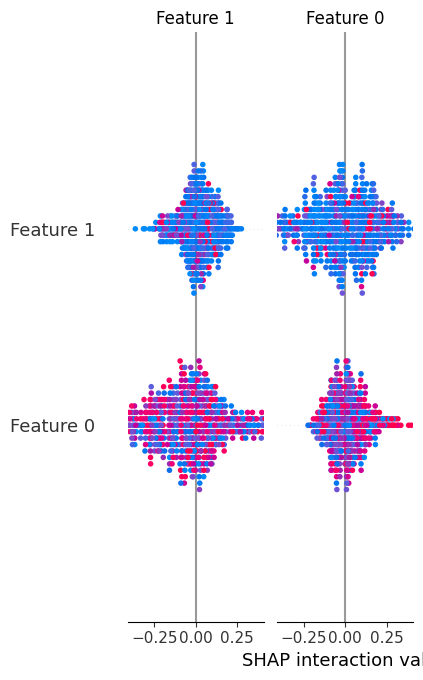

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16581178684050268
Prediction_local [0.32002903]
Right: 0.98


In [ ]:
# SHAP Explainability
import shap

# Ensure X_test is a NumPy array (convert if necessary)
X_test = np.array(X_test)

# SHAP Values
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# LIME Explainability
import lime.lime_tabular

# LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Not Fraud', 'Fraud'],
    verbose=True,
    mode='classification'
)

# Ensure X_test is a DataFrame (if it's not)
X_test = pd.DataFrame(X_test)

lime_exp = lime_explainer.explain_instance(X_test.iloc[0].values, rf_model.predict_proba)
lime_exp.show_in_notebook()


Anomaly Detection (Autoencoder)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Autoencoder Structure
input_dim = X_train.shape[1]
encoding_dim = 14  # Size of the encoded space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 39625692.0000 - val_loss: 40904632.0000
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40518292.0000 - val_loss: 40904092.0000
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40799484.0000 - val_loss: 40903452.0000
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41809184.0000 - val_loss: 40903280.0000
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 40448504.0000 - val_loss: 40903164.0000
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 40427480.0000 - val_loss: 40903076.0000
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40348312.0000 - val_loss: 40903016.0000
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39575944.0000 - val_loss: 40902968.0000
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 40648788.0000 - val_loss: 40902932.0000
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40997036.0000 - val_loss: 40902904.0000
Epoch 11/50
34/34

PCA, t-SNE, Heatmap

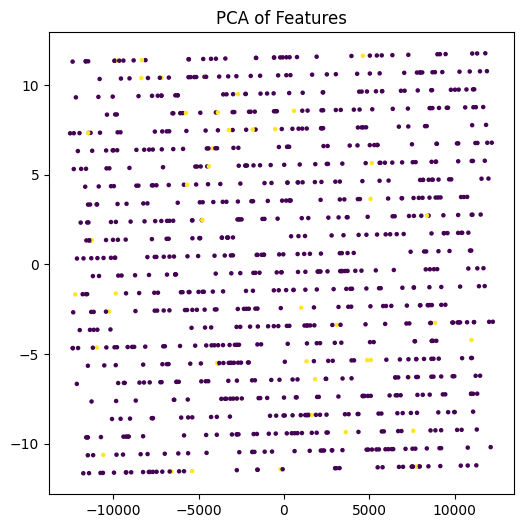

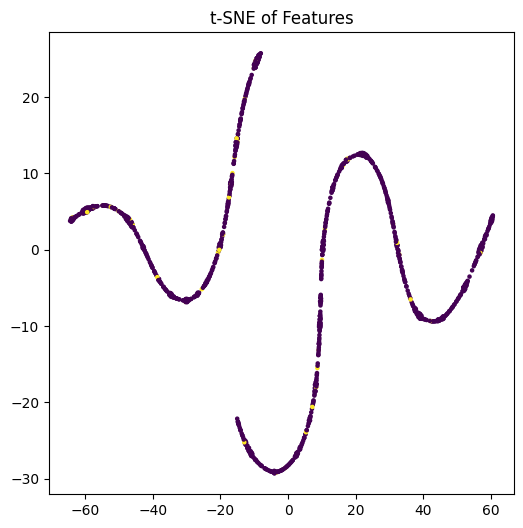

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=y, cmap='viridis', s=5)
plt.title('PCA of Features')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='viridis', s=5)
plt.title('t-SNE of Features')
plt.show()

Ensemble Learning (Voting Classifier)

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your Keras model function
def create_keras_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
keras_model = KerasClassifier(build_fn=create_keras_model, epochs=10, batch_size=32, verbose=0)

# Define other classifiers (Random Forest, etc.)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a voting classifier (ensemble)
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('keras', keras_model)], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the model
print("Ensemble Model Accuracy:", ensemble_model.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ensemble Model Accuracy: 0.965


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

rf_model.fit(X_train, y_train)

models = {
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "Gradient Boosting": gb_model.predict_proba(X_test)[:, 1],
    "Logistic Regression": lr_model.predict_proba(X_test)[:, 1],
    "Decision Tree": dt_model.predict_proba(X_test)[:, 1],
    "SVM": svm_model.decision_function(X_test),  # For SVM use decision_function
    "Ensemble Model": ensemble_model.predict_proba(X_test)[:, 1],
    "LSTM": lstm_model.predict(X_test).ravel(),  # Ensure LSTM predictions are flattened
    "ANN": ann_model.predict(X_test).ravel()
}

# Plot the ROC Curve for each model
plt.figure(figsize=(10, 7))

for model_name, y_pred_prob in models.items():
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels and legend
plt.title('ROC Curve Comparison of Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

NameError: name 'gb_model' is not defined